<a href="https://colab.research.google.com/github/jiminkyung/orm/blob/main/python/DAY12/240115_%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%98%A4%EB%B2%84%EB%9D%BC%EC%9D%B4%EB%94%A9_%EC%B6%94%EC%83%81_%EB%B9%84%EA%B3%B5%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Matplotlib 간단한 실습

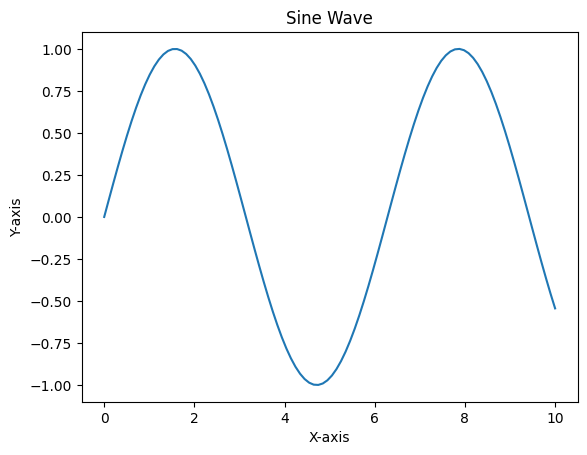

In [ ]:
# 필요한 라이브러리를 임포트합니다
import matplotlib.pyplot as plt
import numpy as np

# 샘플 데이터를 생성합니다
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 그래프를 생성합니다
plt.plot(x, y)
plt.title("Sine Wave")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# 그래프를 파일로 저장합니다
plt.savefig('sample.png')

# 그래프를 화면에 표시합니다
plt.show()

# Class - 3번째 시간

In [ ]:
from datetime import datetime

datetime.now() # 현재시간
datetime.now().date()
datetime.now().year
datetime.now().month
datetime.now().hour
datetime.now().min

d = datetime.now()
print(f"{d.year}/{d.month}/{d.day}") # 실무에서 잘 사용하는 타입은 아님
# 가볍게 사용하긴 좋지만, 날짜나 시간은 타입이 있습니다.

2024/1/15


In [ ]:
d.strftime("올해 년도는 %Y!")
d.strftime("%y/%m/%d")
d.strftime("%Y/%m/%d") # 가장 많이 사용되는 date format.
# 하나만 기억해야 한다면 마지막 버전으로!

'2024/08/01/15/24'

```
d.strftime("%Y/%m/%d")
```
이거 하나만 기억해둬도 된다!

## User 클래스

비밀번호 부분 작성할땐?

- 암호화 해서 저장해야한다.
- Django에서도 sha256(해쉬값으로)을 사용합니다. 은행권에서는 이 알고리즘이 깨졌다고 보고 있습니다.
- MD5라는 알고리즘을 암호화 알고리즘으로 많이 사용했었는데 이게 깨졌음. => 레인보우 어택!
---
(강사님이 따로 안적으신 부분)
- 그래서 만약 비밀번호가 `apple`이라고 했을때, salt라는 것을 붙인다.
- 의미없는 단어(솔트)를 붙여 `appleyahoo`라는 값으로 만들어서, 해쉬값을 복호화할때 추정하기 더 어렵게 만들어준다.


In [ ]:
from datetime import datetime

class User:
    user_count = 0
    gender = {'남', '여'}

    def __init__(self, name, joindate, gender, age, email, password):
        self.joindate = joindate
        self.accessdate = joindate
        self.name = name
        self.gender = gender
        self.age = age
        self.email = email
        self.password = password # 실무에서 이렇게 저장하면 절대 안됨.
        # (실제로 Django에서도 이렇게 저장해서 오류나는 경우 많습니다.) # 나머지는 밑에 적겠음.

In [ ]:
user1 = User("지민경", "2024/01/15", "여", 10, "me@yaho.com", "1q2w3e4r!")

print(user1.name)
print(user1.accessdate)

User.user_count = 1

user2 = User("홍길동", "2024/01/15", "남", 30, "you@yaho.com", "1q2w3e4r!")
print(user2.name)

print(user1.user_count)
User.user_count = 2
print(user1.user_count)

지민경
2024/01/15
홍길동
1
2


무엇을 알 수 있을까?
> 실제로 class와 인스턴스의 메모리 영역은 교집합 상태.

> 한 곳에서 수정이 되면 모두 수정이 됩니다!

> 그래서 처음에 클래스를 설게하실 때 모든 인스턴스에 있을 변수(클래스 변수)와  
인스턴스에만 있는 변수(인스턴스 변수)를 나누는것이 매우 중요합니다!

---

클래스 변수는 웬만하면 적게 설정해야 하는게 맞다.  
반드시는 아니고 권고사항임.(불문율 같은?) 메모리가 커지는것을 방지하기 위해서다.  
하지만 거대한 아키텍쳐를 만들지 않는이상 굳이 신경쓸 필요는 없다.

In [ ]:
# 수정된 버전
# 이해 X, 복습 X
import hashlib
import re
from datetime import datetime

class User:
    user_count = 0
    gender = ('남', '여')

    def __init__(self, name, joindate, gender, age, email, password):
        self.joindate = joindate
        self.accessdate = joindate
        self.name = name
        self.gender = gender
        self.age = age
        self.email = email
        self.password = self._hash_password(password)

    def _hash_password(self, password):
        return hashlib.sha256(password.encode()).hexdigest()

    def change_password(self, password): # django의 user.set_password('비밀번호')와 비슷한 역할
        if len(password) < 8: # validate 또는 유효성 검증이라고 합니다.
            print('너무 짧습니다!')
            return
        self.password = self._hash_password(password)
        self.accessdate = datetime.now().strftime('%Y/%m/%d')

    def update_email(self, email):
        if self._validate_email(email):
            self.email = email
            self.accessdate = datetime.now().strftime('%Y/%m/%d')
        else:
            print("유효하지 않은 이메일 주소입니다.")

    def _validate_email(self, email):
        pattern = r"[\w.-]+@[\w.-]+\.\w+"
        return re.match(pattern, email) is not None

    def display_profile(self):
        print(f'name: {self.name}')
        print(f'joindate: {self.joindate}')
        print(f'accessdate: {self.accessdate}')
        print(f'email: {self.email}')

    def __str__(self):
        return self.name

    def __repr__(self):
        return self.name

user1 = User('이호준', '2024/01/15', '남', 15, 'hojun@gmail.com', '1q2w3e4r!')
user2 = User('홍길동', '2024/01/15', '남', 30, 'gildong@gmail.com', '1q2w3e4r!!')

print(user1)
user1.display_profile()
user1.password

이호준
name: 이호준
joindate: 2024/01/15
accessdate: 2024/01/15
email: hojun@gmail.com


'febd93f04bda1aec0d374f8fd014d062525934feb1f1b81ee7c64d61f66b84b1'

## Cart, Product 클래스

In [ ]:
# 온라인 쇼핑몰에서 장바구니에 집어넣기

class Cart:
    def __init__(self):
        self.items = []

    def add_item(self, item, count):
        self.items.append({
            "물품": item,
            "갯수": count,
            })

    def total_price(self):
        total_sum = 0
        for i in self.items:
            total_sum += i["물품"].price * i["갯수"]
        return format(total_sum, ",")

class Product:
    def __init__(self, product_name, price):
        self.product_name = product_name
        self.price = price

    def __str__(self): # print문으로 출력하면 나옴
        return self.product_name

    def __repr__(self): # 아래처럼 빼고 출력할때 나옴
        return self.product_name

로지텍키보드 = Product("키보드", 50000)
LG모니터 = Product("LG모니터", 300000)
그래픽카드4090 = Product("GTX4090", 2000000)

jimmy_cart = Cart()
jimmy_cart.add_item(로지텍키보드, 10)
jimmy_cart.add_item(LG모니터, 10)
jimmy_cart.add_item(그래픽카드4090, 2)

jimmy_cart.items

jimmy_cart.total_price()

'7,500,000'

# 이론

## 클래스 메서드
- **클래스 메서드는 클래스 변수를 변경하고 싶을 때 사용**합니다.(중요)
- 주의해야 할 점 첫번째, 인자로 오는 `cls`는 관습으로 고정입니다.
- `self`가 a로 바꾸면 작동은 하지만 관습적으로 안되는 것처럼 `cls`도 바꾸시면 안됩니다.
- `cls`는 `class`를 나타냅니다.

In [ ]:
# 클래스 메서드
# 클래스 메서드는 클래스 변수를 변경하고 싶을 때 사용합니다.
# 주의해야 할 점이 첫번째 인자로 오는 cls는 관습으로 고정입니다.
# self가 a로 바꾸면 작동은 하지만 관습적으로 안되는 것처럼 cls도 바꾸시면 안됩니다.
# cls는 class를 나타냅니다.

class MyClass:
    count = 0

    @classmethod
    def increment(cls):
        cls.count += 1

MyClass.increment()
print(MyClass.count)  # 출력: 1

1


## 정적 메서드
- 언제 쓰느냐?! 정적 메서드는 self로 내부 변수에 접근이 안되어서
- 책 클래스 만든 것 중 할인율 같이 관련은 있는데, 밖으로 함수를 빼기 부담스러운 것들을 이렇게 사용합니다.

In [ ]:
# 정적 메서드
# 언제 쓰느냐!? 정적 메서드는 self로 내부 변수에 접근이 안되서
# 책 클래스 만든 것 중 할인율 같이 관련은 있는데 밖으로 함수를 빼기 부담스러운 것들을 이렇게 사용합니다.

class MyClass:
    @staticmethod
    def my_method(x, y):
        return x + y

print(MyClass.my_method(5, 3))  # 출력: 8

8


In [ ]:
class Book:
    def __init__(self, name, price):
        self.name = name
        self.price = price

    @staticmethod
    def 할인율(원가, 할인):
        return 원가 * (1 - (할인/100))

Book.할인율(9000, 10) # 밖으로 뺄 수 있는 함수이고, 굳이 안에 들어갈 필요가 없죠?
# 그런데 할인율은 Book과 연관이 있습니다. # 관련이 있으면 안으로 넣어주세요~
# 이렇게 코딩을 하시면 유지보수하기가 좋습니다.

8100.0

In [ ]:
# 비권장하는 케이스

class Book:
    def __init__(self, name, price):
        self.name = name
        self.price = price

# 밖으로 뺐을경우(클래스 밖으로 뺐을때)
def 할인율(원가, 할인):
        return 원가 * (1 - (할인/100))

book1 = Book("python 100제", 9000)

할인율(book1.price, 10)

8100.0

글로벌 코드에서는 권장코드처럼 클래스 안에 넣어주는것을 선호한다.  
나도 저게 나아보인다.

## 속성 접근자(Property)
- 중요도가 높진 않음. 2~3년에 한번 보게 될거임. 별표 0.5개

In [ ]:
class Person:
    def __init__(self, first_name, last_name):
        self._first_name = first_name
        self._last_name = last_name

    @property
    def full_name(self):
        return f'{self._first_name}{self._last_name}'

licat = Person('li', 'cat')
print(licat._first_name)
print(licat._last_name)
print(licat.full_name) # 마치 속성이 있는것처럼 사용할 수 있다.
# print(licat.full_name())

li
cat
licat


## 덕 타이핑
- (강사님이 자주 사용하시는 기법임)
- (대상보다는 그 액션이 중요할 때 사용)
- 별표 0.3개

In [ ]:
# 덕타이핑
# https://world.weniv.co.kr/

# licat.move()
# move() => 직관적이고 누가 움직이는지는 알고 싶지 않고 주인공을 앞으로 한 칸 움직이고 싶다.

class Duck:
    def quack(self):
        print('꽥꽥!')

class Person:
    def quack(self):
        print("안녕하세요!")

def quack(obj):
    obj.quack()

duck = Duck()
person = Person()

quack(duck)  # 출력: 꽥꽥! # duck.quack() 대신 quack(duck)을 사용하겠다.
quack(person)  # 출력: 안녕하세요! # person.quack() 대신 quack(person)을 사용하겠다.

꽥꽥!
안녕하세요!


## 메서드 오버라이딩

- 하위 클래스에서 상위 클래스의 메서드를 재 정의하는것.

In [ ]:
# 오버라이딩
# 자식이 부모의 메서드를 덮어 쓰는 것

class Animal:
    def sound(self):
        print("기본 동물 울음 소리, 악!")

class Dog(Animal):
    def sound(self):
        print("왈왈!")

class Cat(Animal):
    def sound(self):
        print("냐옹!")

# super()를 사용해서 부모의 메서드를 사용 할 수 있습니다.
class Bird(Animal):
    def sound(self):
        super().sound()
        print("짹짹!")

b = Bird()
b.sound()

기본 동물 울음 소리, 악!
짹짹!


In [ ]:
class Person:
    def __init__(self, name):
        self.name = name

class Student(Person):
    def __init__(self, name, student_id):
        super().__init__(name)  # 부모 클래스의 __init__ 메서드 호출
        # self.name = name 위 코드와 이코드는 동일합니다.
        self.student_id = student_id

s = Student("Alice", "S12345")
print(s.name)        # 출력: Alice
print(s.student_id)  # 출력: S12345

Alice
S12345


오버로딩은 파이썬에 없다!!! 기억하지 마셈

## 추상 클래스

반드시 구현되어야 하는 메서드를 명시하면, 그것을 상속한 클래스에서는 반드시 그 메서드를 구현해야 합니다.  
언제 사용하나요? 예를 들어 빠뜨리면 안되는 메서드가 있는 경우  
게시판 만드는데 게시물 업데이트 날짜, 생성 날짜를 추상 클래스로 구현할 수 있습니다.

- 중요도는 높지만 빈도가 낮아 별 0.5개


In [ ]:
# 추상 클래스
# 중요도는 높지만 빈도가 낮아 별 0.5개
# 추상 클래스: 반드시 구현되어야 하는 메서드를 명시하면
# 그것을 상속한 클래스에서는 반드시 그 메서드를 구현해야 합니다.
# 언제 사용하나요? 예를 들어 빠트리면 안되는 메서드가 있는 경우
# 게시판 만드는데 게시물 업데이트 날짜, 생성 날짜를 추상 클래스로 구현할 수 있습니다.

from abc import ABC, abstractmethod

class AbstractClassExample(ABC):

    @abstractmethod
    def do_something(self):
        pass

class Person(AbstractClassExample):

    def __init__(self, name):
        self.name = name

    def print_name(self):
        print(f'제 이름은 {self.name}입니다.')

    def do_something(self):
        print("hello")

hojun = Person('hojun')
hojun.print_name()

제 이름은 hojun입니다.


## 비공개 속성

- 파이썬에서 비공개 속성이 있다?없다? 라고 한다면  
없다. 라고 해야한다. 비공개 속성이 있긴 하지만 밖에서 읽을 수 있기 때문이다...
- **완전히 감춰지는 변수가 아닙니다.**
- 별표 0.3개?

In [ ]:
# 비공개 속성
# 시큐어 코딩에서 이런거 많이 사용함.

class MyClass:
    __a = 10 # 비공개 속성(Private Attributes)
    _a = 100
    b = 20

    def __init__(self, c, d):
        self.__c = c
        self.d = d

c = MyClass(30, 40)
c._a # 보통 다른언어에서는 _ 한개가 prive value입니다.
# 실무에서는 _변수 는 '이 변수 수정하지마'라는 뜻인 경우가 많다. 실제로 그렇게 작용되진 않지만.
# c.__a
# 어? 접근이 안되네?! 이걸로 변수를 감추면 되겠다! => 이렇게 생각하면 안된다는 것입니다.


# c.__a #error
# c._a # 출력: 100
# c.b # 출력: 20
# # c.__c # error
# c.d # 출력: 40

print(c._MyClass__c) # 실제로는 이렇게 출력할 수 있습니다.

30
